In [1]:
from astropy.table import Table

import numpy as np

from statsmodels.nonparametric.smoothers_lowess import lowess

import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/')
from mass_ratio_plottingFunctions import median_hist, param_hist, param_hist_scatter, param_CDF

In [2]:
IMAGE_DIR = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/images/'

master_table = Table.read('../spirals/Pipe3D-master_file_vflag_10_smooth2p27_N2O2_noWords.txt', 
                          format='ascii.commented_header')

#### Remove bad galaxies

In [3]:
bad_boolean = master_table['curve_used'] == -99

good_galaxies = master_table[np.logical_not(bad_boolean)]

#### Split galaxies into "walls" and "voids"

In [4]:
vboolean = good_galaxies['vflag'].data == 1
wboolean = good_galaxies['vflag'].data == 0

void_table = good_galaxies[vboolean]
wall_table = good_galaxies[wboolean]

# Mass as a function of absolute magnitude

In [5]:
rabsmag_bins = np.array([-22, -21, -20, -19, -18])

## Median mass ratio

In [6]:
void_smooth = lowess(void_table['Mdark_Mstar_ratio'], void_table['rabsmag'], frac=0.25)
wall_smooth = lowess(wall_table['Mdark_Mstar_ratio'], wall_table['rabsmag'], frac=0.25)

<IPython.core.display.Javascript object>


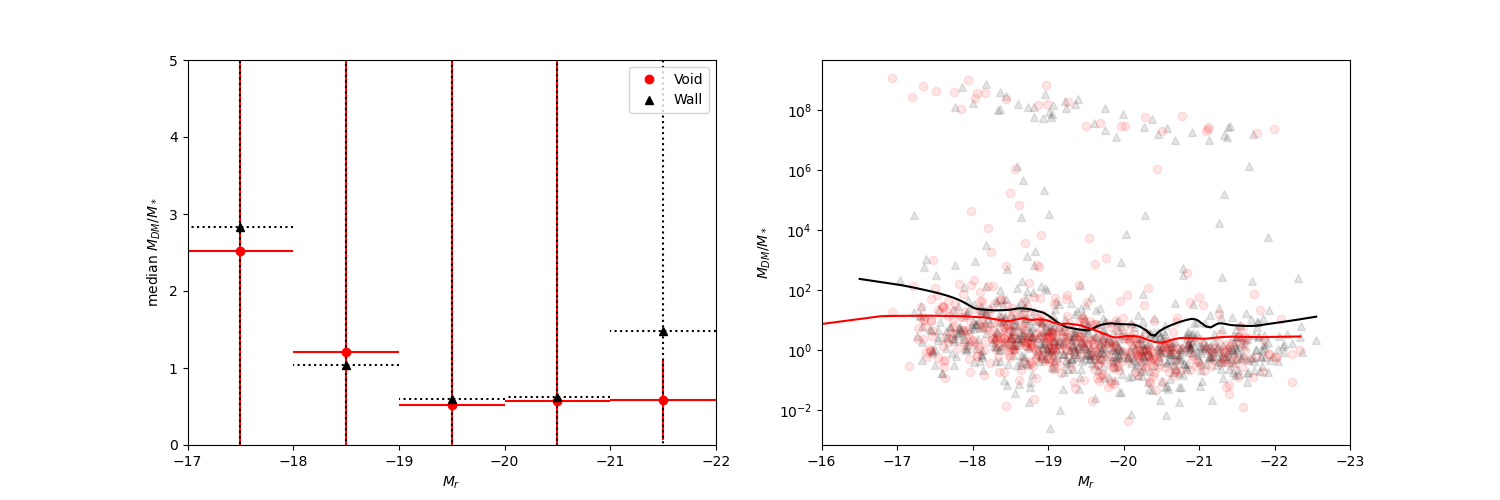

In [7]:
%matplotlib notebook

plt.figure(figsize=(15,5))


plt.subplot(121)

median_hist(void_table, wall_table, 'rabsmag', 'Mdark_Mstar_ratio', rabsmag_bins)

plt.xlim(-17,-22)
plt.ylim(0,5)


plt.subplot(122)

plt.semilogy(wall_table['rabsmag'], wall_table['Mdark_Mstar_ratio'], 'k^', alpha=0.1)
plt.semilogy(void_table['rabsmag'], void_table['Mdark_Mstar_ratio'], 'ro', alpha=0.1)

plt.semilogy(wall_smooth[:,0], wall_smooth[:,1], 'k')
plt.semilogy(void_smooth[:,0], void_smooth[:,1], 'r')

plt.xlim(-16,-23)

plt.xlabel('$M_r$')
plt.ylabel('$M_{DM}$/$M_*$');

## Median total mass, stellar mass

In [8]:
Mtot_void_smooth = lowess(void_table['Mtot'], void_table['rabsmag'], frac=0.25)
Mtot_wall_smooth = lowess(wall_table['Mtot'], wall_table['rabsmag'], frac=0.25)

Mstar_void_smooth = lowess(void_table['Mstar'], void_table['rabsmag'], frac=0.25)
Mstar_wall_smooth = lowess(wall_table['Mstar'], wall_table['rabsmag'], frac=0.25)

<IPython.core.display.Javascript object>


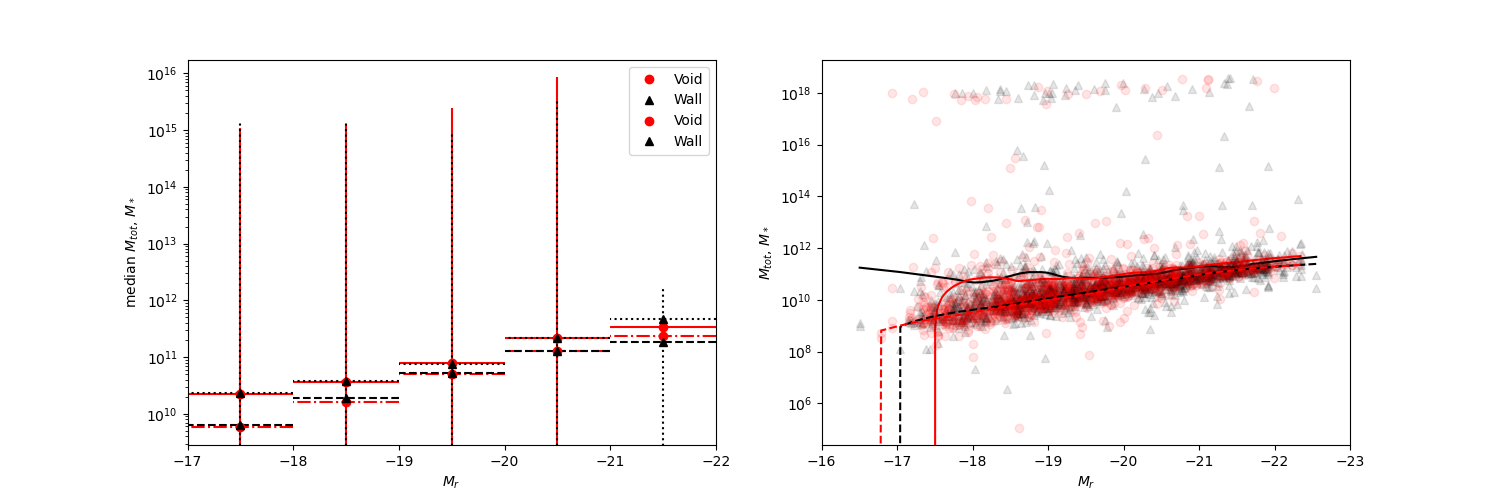

In [10]:
%matplotlib notebook

plt.figure(figsize=(15,5))


#------------------------------------------------------------------------------
plt.subplot(121)

median_hist(void_table, wall_table, 'rabsmag', 'Mtot', rabsmag_bins)
median_hist(void_table, wall_table, 'rabsmag', 'Mstar', rabsmag_bins, 
            error_linestyle=['-.', '--'])

plt.yscale('log')
plt.xlim(-17,-22)

plt.ylabel('median $M_{tot}$, $M_*$')
#------------------------------------------------------------------------------


#------------------------------------------------------------------------------
plt.subplot(122)

# Total mass
plt.semilogy(wall_table['rabsmag'], wall_table['Mtot'], 'k^', alpha=0.1)
plt.semilogy(void_table['rabsmag'], void_table['Mtot'], 'ro', alpha=0.1)

plt.semilogy(Mtot_wall_smooth[:,0], Mtot_wall_smooth[:,1], 'k')
plt.semilogy(Mtot_void_smooth[:,0], Mtot_void_smooth[:,1], 'r')

# Stellar mass
plt.semilogy(wall_table['rabsmag'], wall_table['Mstar'], 'k^', alpha=0.1)
plt.semilogy(void_table['rabsmag'], void_table['Mstar'], 'ro', alpha=0.1)

plt.semilogy(Mstar_wall_smooth[:,0], Mstar_wall_smooth[:,1], 'k--')
plt.semilogy(Mstar_void_smooth[:,0], Mstar_void_smooth[:,1], 'r--')

plt.xlim(-16,-23)

plt.xlabel('$M_r$')
plt.ylabel('$M_{tot}$, $M_*$');
#------------------------------------------------------------------------------

# Distribution of $M_r$

In [7]:
rabsmag_bins = np.array([-22, -21, -20, -19, -18, -17])

<IPython.core.display.Javascript object>


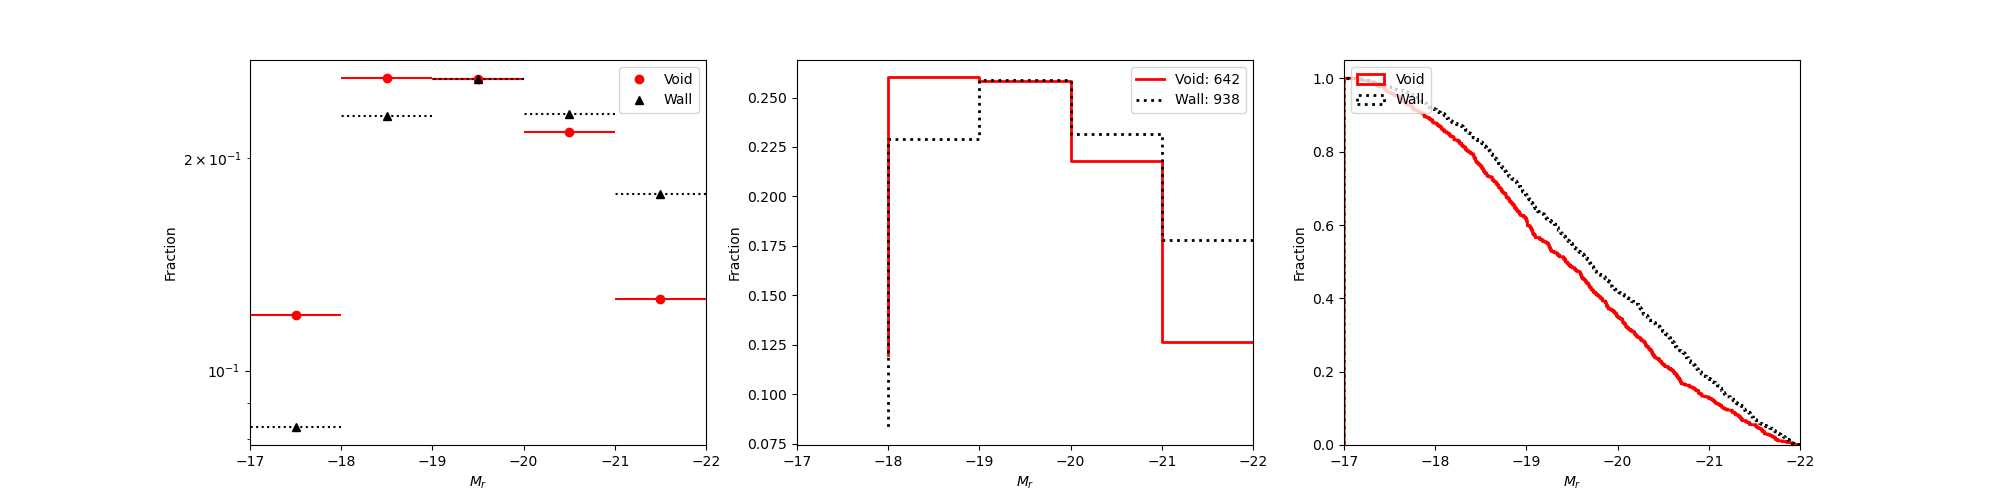

(-17.0, -22.0)

In [8]:
%matplotlib notebook

plt.figure(figsize=(20,5))


plt.subplot(131)
param_hist_scatter(void_table, wall_table, 'rabsmag', rabsmag_bins)
plt.xlim([-17,-22])


plt.subplot(132)
param_hist(void_table, wall_table, 'rabsmag', rabsmag_bins)
plt.xlim([-17,-22])


plt.subplot(133)
param_CDF(void_table, wall_table, 'rabsmag', (-22, -17))
plt.xlim([-17,-22]);

# Mass ratio v. maximum probed radius

In [11]:
v_smooth = lowess(void_table['Mdark_Mstar_ratio'], void_table['Rmax'], frac=0.25)
w_smooth = lowess(wall_table['Mdark_Mstar_ratio'], wall_table['Rmax'], frac=0.25)

<IPython.core.display.Javascript object>


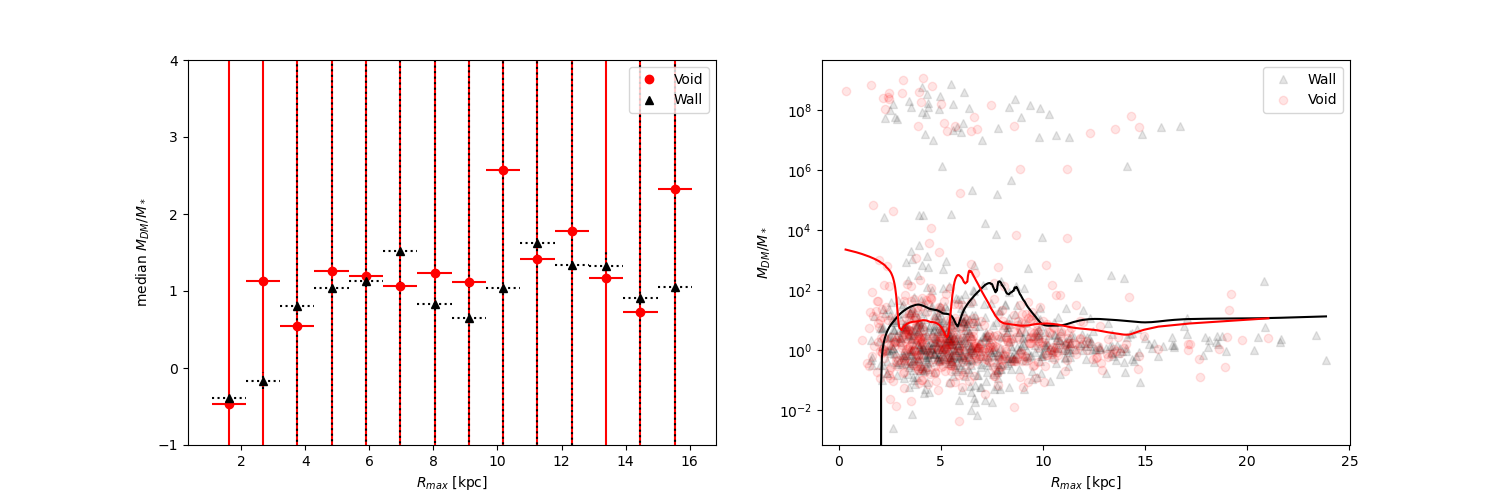

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3332: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
%matplotlib notebook

plt.figure(figsize=(15,5))


#------------------------------------------------------------------------------
plt.subplot(121)

median_hist(void_table, wall_table, 'Rmax', 'Mdark_Mstar_ratio', 
            np.linspace(0,15,15))

plt.ylim([-1,4])
#------------------------------------------------------------------------------


#------------------------------------------------------------------------------
plt.subplot(122)

plt.semilogy(wall_table['Rmax'], wall_table['Mdark_Mstar_ratio'], 'k^', alpha=0.1, 
             label='Wall')
plt.semilogy(void_table['Rmax'], void_table['Mdark_Mstar_ratio'], 'ro', alpha=0.1, 
             label='Void')

plt.plot(w_smooth[:,0], w_smooth[:,1], 'k')
plt.plot(v_smooth[:,0], v_smooth[:,1], 'r')

plt.xlabel('$R_{max}$ [kpc]')
plt.ylabel('$M_{DM}$/$M_*$')

plt.legend();
#------------------------------------------------------------------------------

In [13]:
v_smooth = lowess(void_table['Mdark_Mstar_ratio'], void_table['avg_r_turn'], frac=0.25)
w_smooth = lowess(wall_table['Mdark_Mstar_ratio'], wall_table['avg_r_turn'], frac=0.25)

<IPython.core.display.Javascript object>


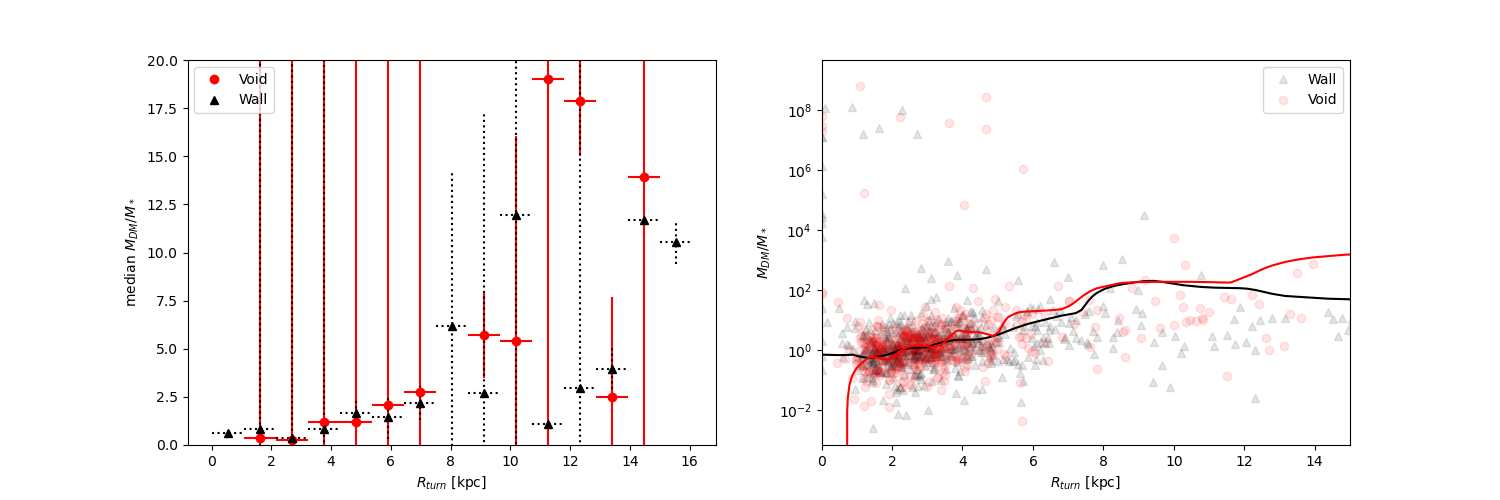

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3332: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
%matplotlib notebook

plt.figure(figsize=(15,5))


#------------------------------------------------------------------------------
plt.subplot(121)

median_hist(void_table, wall_table, 'avg_r_turn', 'Mdark_Mstar_ratio', 
            np.linspace(0,15,15))

plt.ylim([0,20])
#------------------------------------------------------------------------------


#------------------------------------------------------------------------------
plt.subplot(122)

plt.semilogy(wall_table['avg_r_turn'], wall_table['Mdark_Mstar_ratio'], 'k^', 
             alpha=0.1, label='Wall')
plt.semilogy(void_table['avg_r_turn'], void_table['Mdark_Mstar_ratio'], 'ro', 
             alpha=0.1, label='Void')

plt.plot(w_smooth[:,0], w_smooth[:,1], 'k')
plt.plot(v_smooth[:,0], v_smooth[:,1], 'r')

plt.xlabel('$R_{turn}$ [kpc]')
plt.ylabel('$M_{DM}$/$M_*$')

plt.xlim([0,15])

plt.legend();
#------------------------------------------------------------------------------

# Messing around

After loosening the limits on $R_{turn}$ and $V_{max}$ in the fits, some of the mass ratios have become ridiculously large.  Below is me just playing around to try and figure out where things are funky and how to best fix them.

In [16]:
good_galaxies[good_galaxies['Mdark_Mstar_ratio']>1000]

MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r,frac_masked_spaxels,Rmax,smoothness_score,CMD_class,Mstar_turn,SFR,sSFR
int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64
8977,12704,756,239,52577,128577,116.98081171079217,34.036706698307135,0.27684542536735535,142.17706298828125,0.01587086357176304,553137024.0,2.0,1444.9400329230818,32321.52261929191,0.4556786510431485,2.651434728381211,7.957051909841801,999999.7856326811,163237311.6654534,0.11837864003289357,1.9064063286868904,40.33524401565804,97.86505307416515,731013997.033056,24.89126049364931,135753806.7636595,16.95086583416529,0.07463289797306061,0.00293918086012013,1343742126756.2847,60115701073895.2,1343733900941.5881,60115701073895.2,8225814.696643169,163355.72225933385,7308175.942551625,-18.171621322631836,37.403858588972824,748.436733260067,1316.3772138947718,150891.55890255075,6.414657457196863,47915004.632951364,-99.0,-99.0,1.0,0,0,0.8841168788713112,4.48169377951756,1.8834295371294765,473284,-99.0,1.2076986581087112,0.2948281201610406,2.768071948292129,1.4018938536176988,1,5368066.214630544,-2.7652406692504883,-10.269437789916992
8944,9102,1948,544,53388,413011,149.9021238713291,34.32021860729502,0.767438530921936,16.3319091796875,0.020907936617732048,1321555584.0,0.0,2774.9402810230113,25529.50962374708,0.6944163229943241,1.8513343742229391,5.034928717998779,126.88035536032947,18.048896007585974,2.4633633218312436,1.0211638048163683,33.825286017268425,253.819047421207,2309048280.161903,122.79805843557051,1900498966.826203,75.8989383695388,0.04546554014086723,0.00140158061843926,7072880011249.899,130141293165688.86,7070686629295.452,130141293165688.86,2193381954.447666,3223.645847435624,59333.62080498233,-18.182580947875977,63.795267098091806,564.8822684362002,2.758426044516076,0.27698824419817103,6.729511284847864,61219861.65846988,-99.0,-99.0,1.0,0,0,0.5034928717998779,3.3825286017268423,7.5898938369538795,1852873,-99.0,1.194717288017273,0.04852758191621734,3.9504820874260007,1.292120111227659,1,1977357643.3579788,-1.0331491231918335,-10.323923110961914
8941,12701,929,323,52581,173478,120.06360413136585,27.58998854067836,0.6931057572364807,122.7322998046875,0.022945469245314598,1319126528.0,2.0,2890.09810251765,43545.80580199789,0.38671642920724897,1.5471168488664473,50.282734264586466,93.11132768911561,13.857747468243053,2.4911250799660074,1.9250187277273447,149.78418708089583,658.1559478270511,8238.497833504372,0.7650640705508067,5.808225505197626,295.0171461702908,0.014148479327559471,0.00073792069951752,9715112931873.852,292759903691463.8,9711576733076.035,292759903691463.8,3536198797.815583,2746.3322308336196,82789.43589718724,-17.924226760864258,31.594467768610915,393.25687674880527,1.7407187922922644,0.24226438881597062,8.735470302803032,81.38340525317665,-99.0,-99.0,2.0,0,3,5.586970473842941,16.64268745343287,32.77968290781009,861224,-99.0,1.669115275144577,0.16088137639601569,5.002461702159559,1.6962056331497302,1,1338101788.0075288,-1.0575430393

In [17]:
avg_good_galaxies = good_galaxies[good_galaxies['curve_used'] == 0]
pos_good_galaxies = good_galaxies[good_galaxies['curve_used'] == 1]
neg_good_galaxies = good_galaxies[good_galaxies['curve_used'] == -1]

<IPython.core.display.Javascript object>


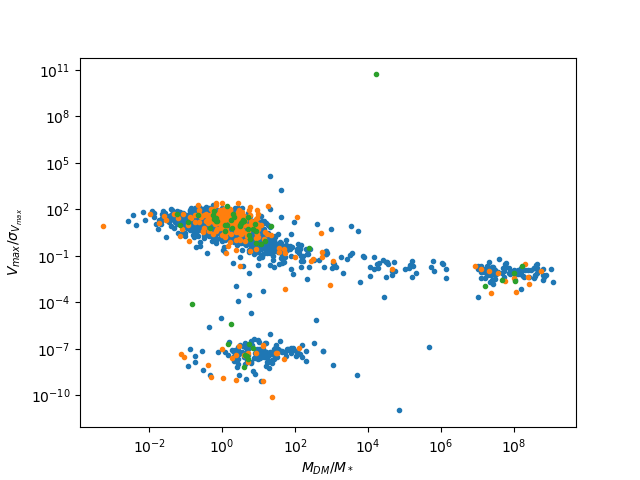

In [19]:
%matplotlib notebook

plt.loglog(avg_good_galaxies['Mdark_Mstar_ratio'], avg_good_galaxies['avg_v_max']/avg_good_galaxies['avg_v_max_sigma'], 
         '.')
plt.loglog(pos_good_galaxies['Mdark_Mstar_ratio'], pos_good_galaxies['pos_v_max']/pos_good_galaxies['pos_v_max_sigma'], 
         '.')
plt.loglog(neg_good_galaxies['Mdark_Mstar_ratio'], neg_good_galaxies['neg_v_max']/neg_good_galaxies['neg_v_max_sigma'], 
         '.')

plt.xlabel('$M_{DM}$/$M_*$')
plt.ylabel('$V_{max}$/$\sigma_{V_{max}}$');

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


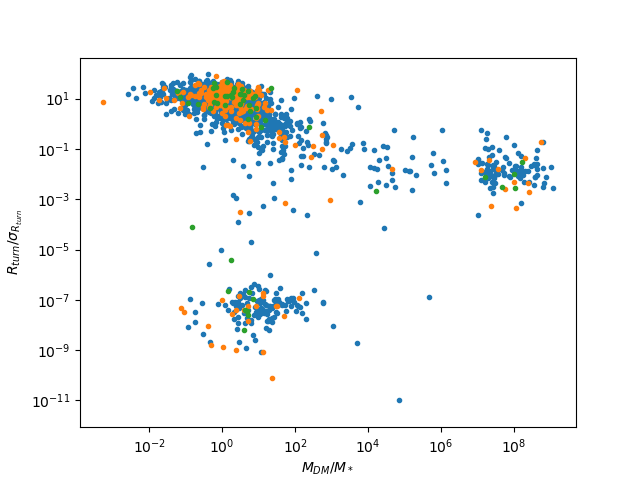

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


In [20]:
%matplotlib notebook

plt.loglog(avg_good_galaxies['Mdark_Mstar_ratio'], 
           avg_good_galaxies['avg_r_turn']/avg_good_galaxies['avg_r_turn_sigma'], 
           '.')
plt.loglog(pos_good_galaxies['Mdark_Mstar_ratio'], 
           pos_good_galaxies['pos_r_turn']/pos_good_galaxies['pos_r_turn_sigma'], 
           '.')
plt.loglog(neg_good_galaxies['Mdark_Mstar_ratio'], 
           neg_good_galaxies['neg_r_turn']/neg_good_galaxies['neg_r_turn_sigma'], 
           '.')

plt.xlabel('$M_{DM}$/$M_*$')
plt.ylabel('$R_{turn}$/$\sigma_{R_{turn}}$');

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


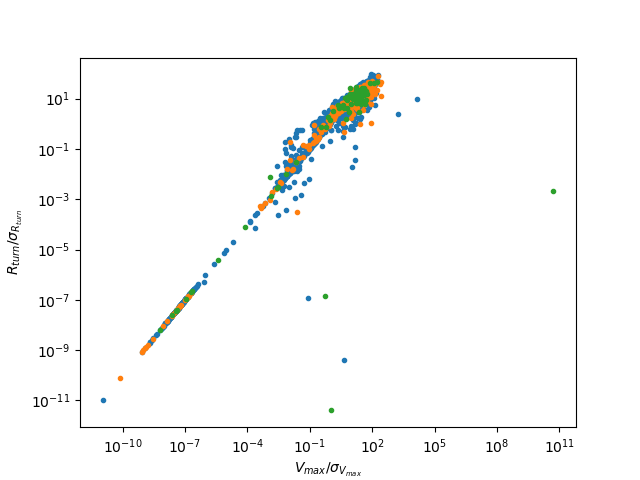

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


In [21]:
%matplotlib notebook

plt.loglog(avg_good_galaxies['avg_v_max']/avg_good_galaxies['avg_v_max_sigma'], 
           avg_good_galaxies['avg_r_turn']/avg_good_galaxies['avg_r_turn_sigma'], 
           '.')
plt.loglog(pos_good_galaxies['pos_v_max']/pos_good_galaxies['pos_v_max_sigma'], 
           pos_good_galaxies['pos_r_turn']/pos_good_galaxies['pos_r_turn_sigma'], 
           '.')
plt.loglog(neg_good_galaxies['neg_v_max']/neg_good_galaxies['neg_v_max_sigma'], 
           neg_good_galaxies['neg_r_turn']/neg_good_galaxies['neg_r_turn_sigma'], 
           '.')

plt.xlabel('$V_{max}$/$\sigma_{V_{max}}$')
plt.ylabel('$R_{turn}$/$\sigma_{R_{turn}}$');